In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("2002.xlsx")

In [4]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1844, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1844 non-null   int64
 1   Maximum length (m))  1844 non-null   int64
 2   Recession(m),        1844 non-null   int64
 3   Rate/yr(m)           1844 non-null   int64
 4   Snout altitude (m)   1844 non-null   int64
dtypes: int64(5)
memory usage: 72.2 KB


In [6]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [7]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1844


In [8]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [9]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [10]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2002,17085,256,37,3517
1,2002,17354,367,13,3563
2,2002,17173,160,24,3502
3,2002,18012,181,24,3536
4,2002,17248,26,33,3551


In [11]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,0.0048,0.0335,0.0123
"Recession(m),",NaN,0.0048,1.0000,0.0189,-0.0093
Rate/yr(m),NaN,0.0335,0.0189,1.0000,-0.0161
Snout altitude (m),NaN,0.0123,-0.0093,-0.0161,1.0000


In [12]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))   1.0000
Rate/yr(m)            0.0335
Snout altitude (m)    0.0123
Recession(m),         0.0048
Year                     NaN
Name: Maximum length (m)), dtype: float64

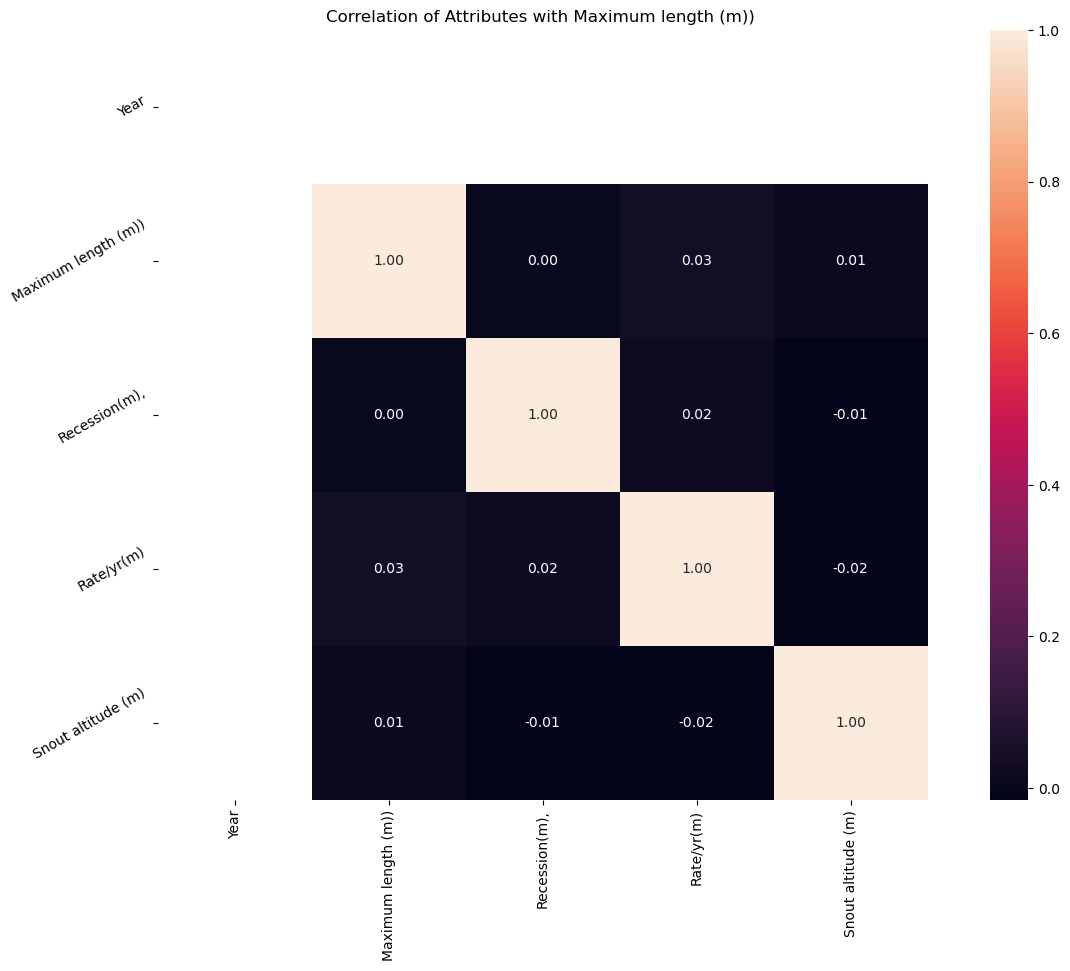

In [13]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [14]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [15]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,844.0000","1,844.0000","1,844.0000","1,844.0000","1,844.0000"
mean,"2,002.0000","17,549.4740",226.2175,27.7148,"3,531.9593"
std,0.0000,299.2656,126.4390,8.6011,20.6189
min,"2,002.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"2,002.0000","17,283.7500",118.0000,20.0000,"3,514.0000"
50%,"2,002.0000","17,564.5000",224.5000,28.0000,"3,532.0000"
75%,"2,002.0000","17,808.0000",340.0000,35.0000,"3,550.0000"
max,"2,002.0000","18,065.0000",440.0000,42.0000,"3,567.0000"


In [16]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

2002   1.0000
Name: Year, dtype: float64

64    0.0054
167   0.0054
106   0.0054
229   0.0049
166   0.0049
       ...  
317   0.0005
326   0.0005
29    0.0005
191   0.0005
276   0.0005
Name: Recession(m),, Length: 433, dtype: float64

21   0.0428
38   0.0385
36   0.0369
27   0.0369
37   0.0369
28   0.0363
17   0.0363
42   0.0358
32   0.0358
29   0.0352
30   0.0352
13   0.0352
19   0.0342
33   0.0331
22   0.0331
26   0.0331
34   0.0331
20   0.0325
40   0.0320
35   0.0320
39   0.0320
41   0.0315
24   0.0315
16   0.0309
25   0.0304
23   0.0293
18   0.0287
15   0.0282
14   0.0266
31   0.0260
Name: Rate/yr(m), dtype: float64

3503   0.0201
3512   0.0184
3555   0.0174
3510   0.0174
3538   0.0174
        ...  
3504   0.0103
3534   0.0103
3530   0.0103
3566   0.0087
3496   0.0011
Name: Snout altitude (m), Length: 72, dtype: float64



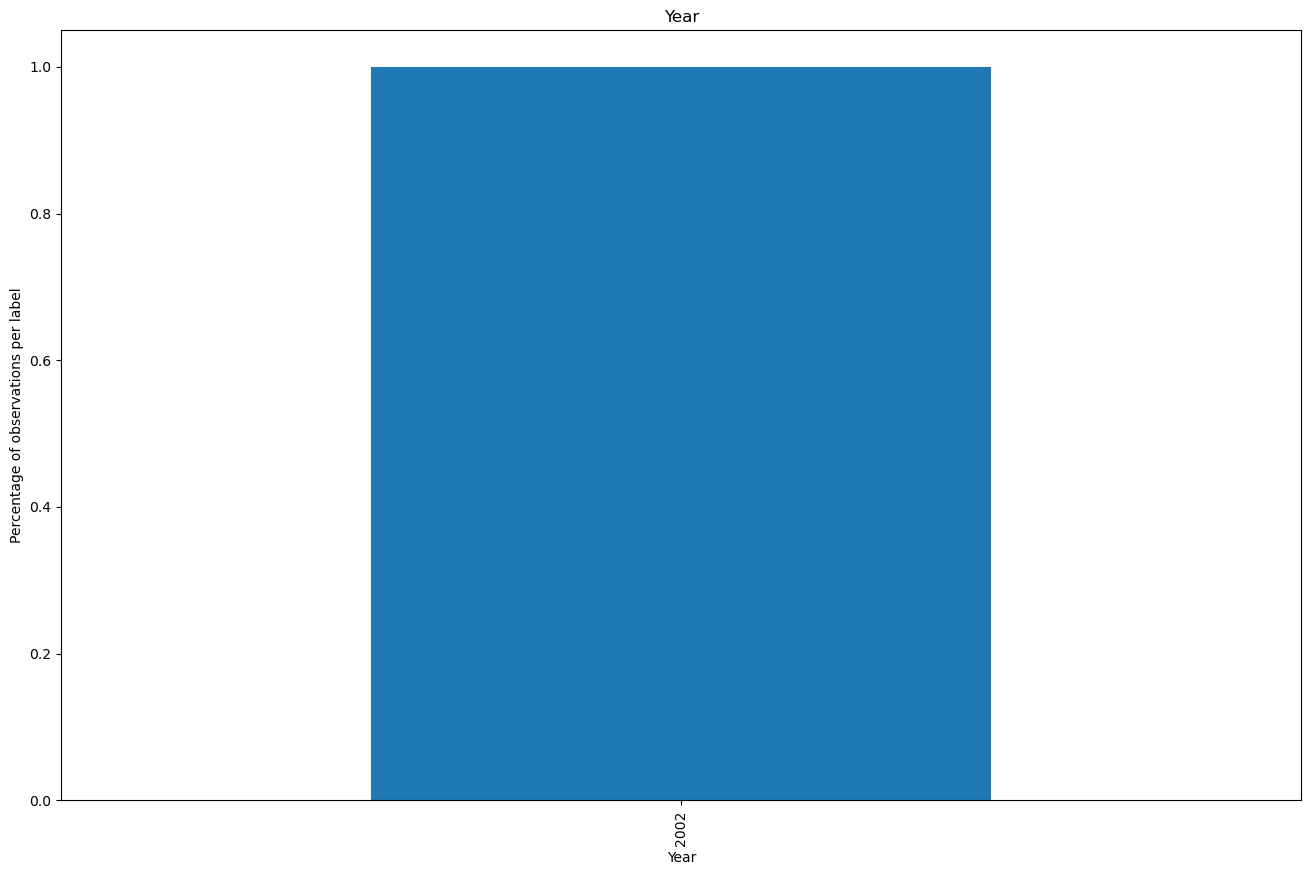

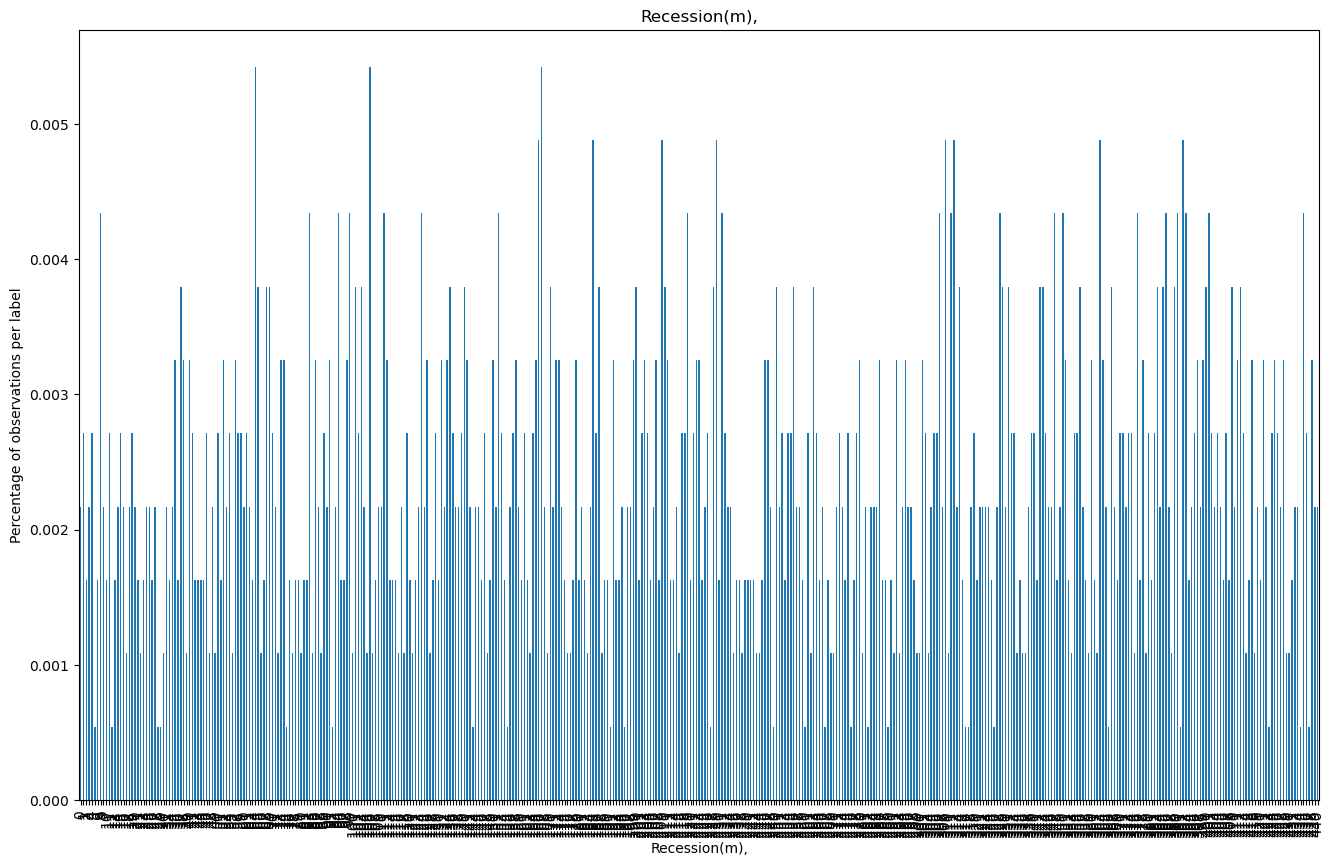

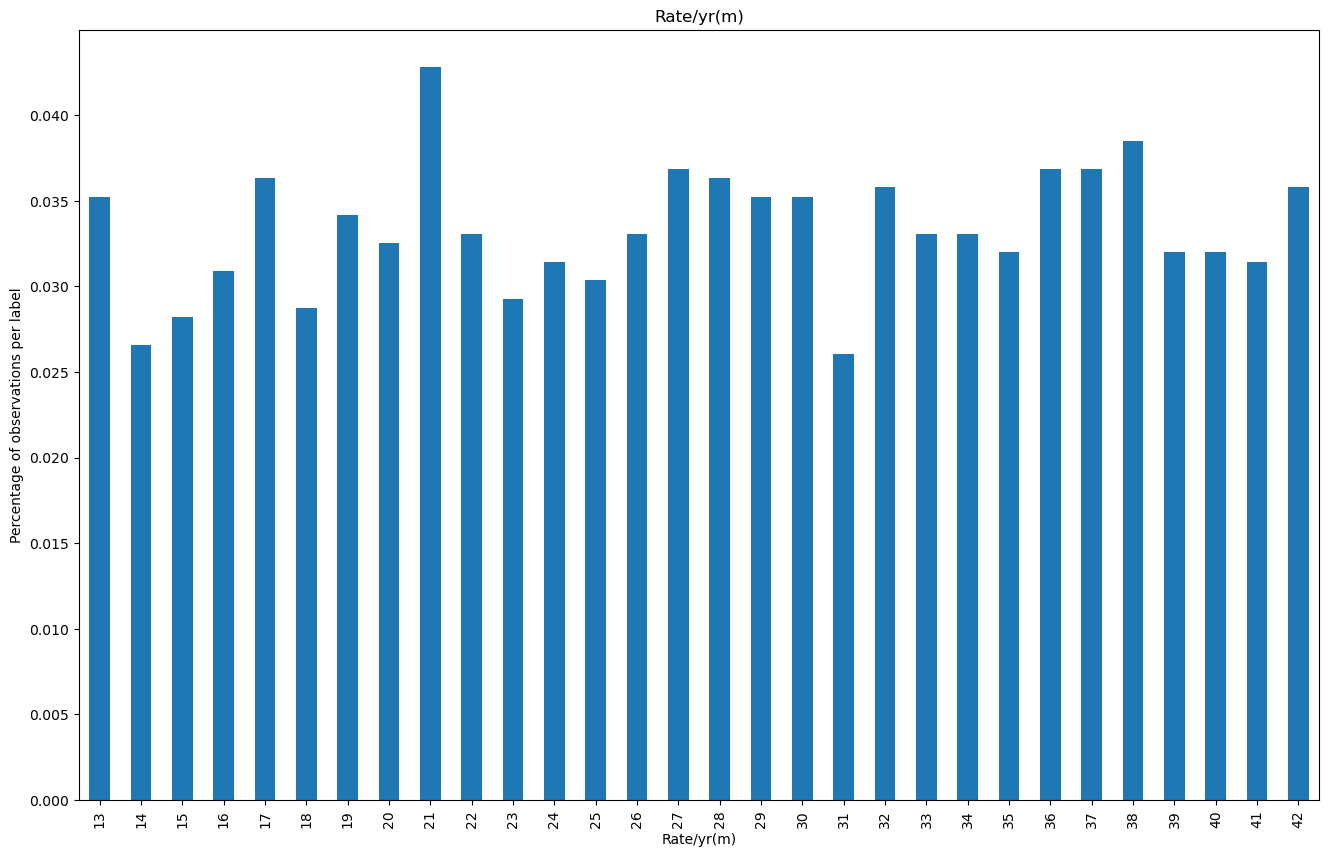

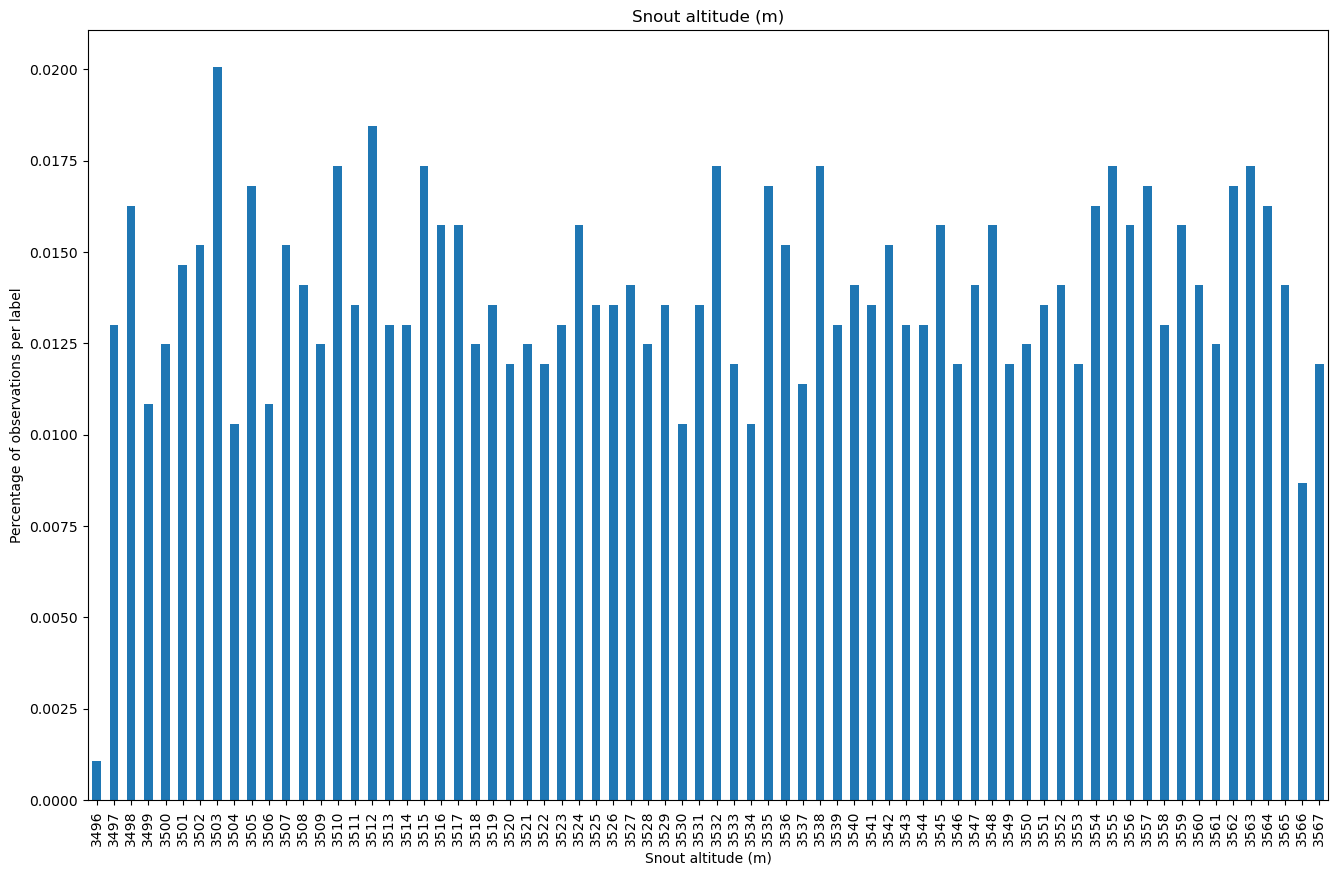

In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()